# Az intercepció hatása a növényzet számára hasznosítható csapadék mértékének alakulására

Az erdei fák számára felvehető csapadék mértékét jelentősen befolyásolja az a vízmennyiség, amit a lombfelület megköt és újra elpárologtat anélkül, hogy az elérhetné a talajfelszínt. Hazai környezetben fenyő esetén a talajfelszínen található vastag száraz tűavar ezt a hatás jelentősen fokozhatja. Az élő lomb és a száraz avar együttes hatásaként visszatartott csapadékmennyiség elérheti az 5-10 mm mértéket, ami sok esetben a teljes csapadékesemény 30-50%-át is jelentheti.

<img src="https://github.com/jsheperd/forest_water/blob/master/img/csapadek.png?raw=true" width="300" height="300" />

### Hipotézis

A növényzet számára felvehető csapadék alakulását nem csak az éves csapadékösszeg befolyásolja, de az eloszlási mintázat is meghatározó. A modellezhetőség szempontjából a legfontosabb tényezők a lombfelület aktuális nagysága, valamint az adott csapdékesemény mértéke mm-ben. A felszíni elfolyást és a mélybeszivárgást első vizsgálatainkban nem vesszük figyelembe, mert azok modellezéséhez további domborzati és talajtani paraméterek is szükségesek.

### Felhasznált adatok

Az [Országos meteorológia Szolgálat 1901-2010 éghajalati adasorai](http://www.met.hu/eghajlat/magyarorszag_eghajlata/eghajlati_adatsorok/) napi csapdékeseményeket is tartalmaznak, ami alkalmas arra, hogy becsléseket tegyünk az aktuális csapadékesemény intercepciós veszteségére 110 éves időszakra vonatkozóan.

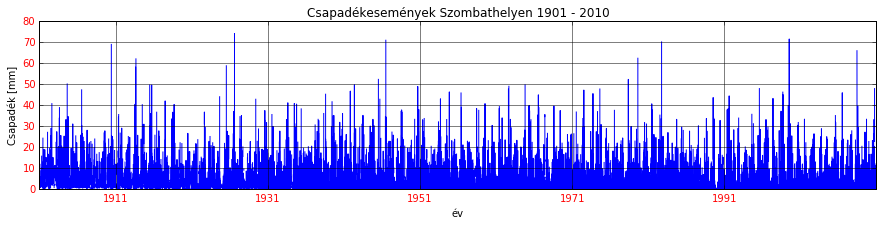

In [102]:
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame, Panel
import matplotlib.pyplot as plt
import numpy as np


dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
szo_daily = pd.read_csv('https://raw.githubusercontent.com/jsheperd/forest_water/master/data/SZO_d.txt', 
                        sep=';',
                        parse_dates=['#datum'], 
                        date_parser=lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
                        )

szo_daily.set_index(szo_daily['#datum'])
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot('#datum', 'd_rs', data=szo_daily)
plt.ylabel(u'Csapadék [mm]')
plt.xlabel(u'év')
plt.title(u'Csapadékesemények Szombathelyen 1901 - 2010')

plt.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('r')
    label.set_fontsize('medium')


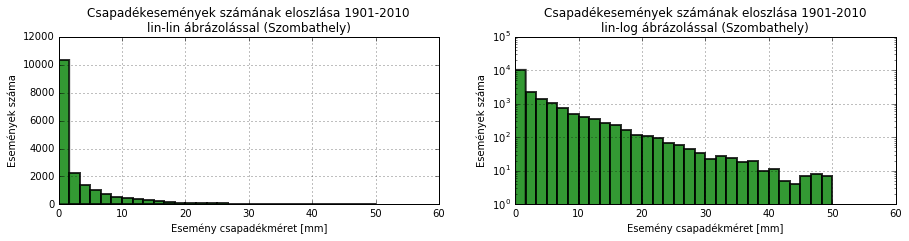

In [186]:
fig, ax = plt.subplots(figsize=(15,3))
plt.subplot(121)
plt.hist(x=szo_daily['d_rs'], bins=30, range=[0, 50], color='green', alpha=0.8, lw=2)
plt.title(u'Csapadékesemények számának eloszlása 1901-2010\nlin-lin ábrázolással (Szombathely)')
plt.ylabel(u'Események száma')
plt.xlabel(u'Esemény csapadékméret [mm]')
plt.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('r')
    label.set_fontsize('medium')


plt.subplot(122)
plt.yscale('log')
plt.hist(x=szo_daily['d_rs'], bins=30, range=[0, 50], color='green', alpha=0.8, lw=2)
plt.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('r')
    label.set_fontsize('medium')


plt.title(u'Csapadékesemények számának eloszlása 1901-2010\nlin-log ábrázolással (Szombathely)')
plt.ylabel(u'Események száma')
plt.xlabel(u'Esemény csapadékméret [mm]')


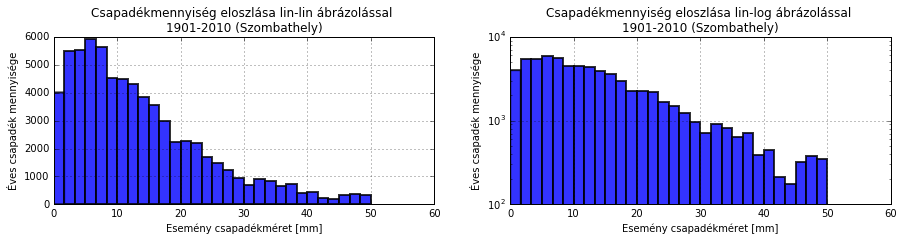

In [185]:
fig, ax = plt.subplots(figsize=(15,3))
plt.subplot(121)
plt.hist(x=szo_daily['d_rs'], bins=30, range=[0, 50], color='blue', alpha=0.8, lw=2, weights=szo_daily['d_rs'])
plt.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('r')
    label.set_fontsize('medium')


plt.title(u'Csapadékmennyiség eloszlása lin-lin ábrázolással \n1901-2010 (Szombathely)')
plt.ylabel(u'Éves csapadék mennyisége')
plt.xlabel(u'Esemény csapadékméret [mm]')
plt.subplot(122)
plt.yscale('log')

plt.hist(x=szo_daily['d_rs'], bins=30, range=[0, 50], color='blue', alpha=0.8, lw=2, weights=szo_daily['d_rs'])
plt.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('r')
    label.set_fontsize('medium')

plt.title(u'Csapadékmennyiség eloszlása lin-log ábrázolással \n1901-2010 (Szombathely)')
plt.ylabel(u'Éves csapadék mennyisége')
plt.xlabel(u'Esemény csapadékméret [mm]')

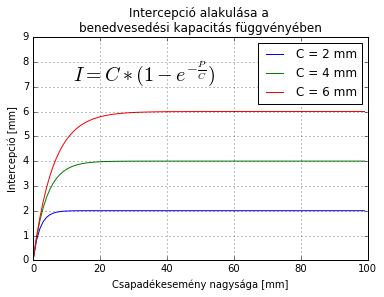

In [182]:
import math

# Intercepciós veszteség
def makeInterceptor(capacity):
    return lambda p: capacity*(1-math.exp(-p/capacity))

p10 = makeInterceptor(10.0)

p = range(0, 100, 1)
c2 = map(makeInterceptor(2.0), p)
c4 = map(makeInterceptor(4.0), p)
c6 = map(makeInterceptor(6.0), p)

df = pd.DataFrame({'P': p, 'C2': c2, 'C4': c4, 'C6': c6})
#df['C'] = df['P'].apply(p10)
plt.plot(df['P'], df['C2'], label="C = 2 mm")
plt.plot(df['P'], df['C4'], label="C = 4 mm")
plt.plot(df['P'], df['C6'], label="C = 6 mm")
plt.legend()
plt.xlabel(u'Csapadékesemény nagysága [mm]')
plt.ylabel(u'Intercepció [mm]')
plt.gca().set_ylim([0,9])
plt.gca().annotate(r'$I = C*( 1 - e^{- \frac{P}{C}})$', xy=(12, 7.2), fontsize=20)
plt.grid(True)
plt.title(u'Intercepció alakulása a \nbenedvesedési kapacitás függvényében')